**Цель**. Вспомнить понятие "квантиль" и проиллюстрировать его на примерах.

Квантиль в математической статистике --- значение, которое заданная случайная величина не превышает с фиксированной вероятностью.

Например, фраза "90-й процентиль массы тела у новорожденных мальчиков составляет 3.9 кг" означает, что 90\% мальчиков рождаются с весом, меньшим либо равным 3.9 кг, а 10\% мальчиков рождаются с весом, большим 3.9 кг.

Рассмотрим вероятностное пространство
$(\Omega ,\;{\mathcal {F}},\;\mathbb {P} ),$ на котором задана случайная величина $X$. Пусть фиксировано $\alpha \in (0,\;1).$ Тогда $\alpha$-квантилем (или квантилем уровня $\alpha$) распределения $\mathbb {P}^{X}$ называется число $x_{\alpha }\in \mathbb{R}$, такое что


$$\mathbb {P} (X\leqslant x_{\alpha })\leqslant \alpha,$$
$$\mathbb {P} (X\geqslant x_{\alpha })\geqslant 1-\alpha.$$

Суть понятия квантиль можно проиллюстрировать на центильных таблица, широко используемых в педиатрии.



![d03[1].jpg](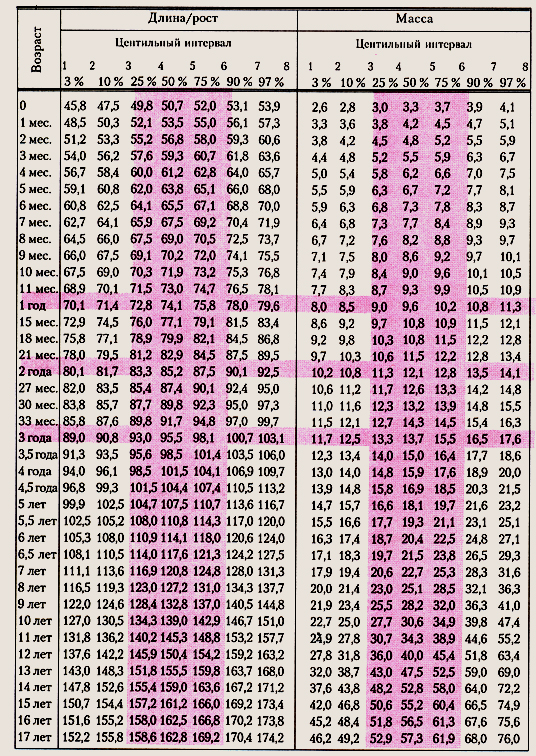)

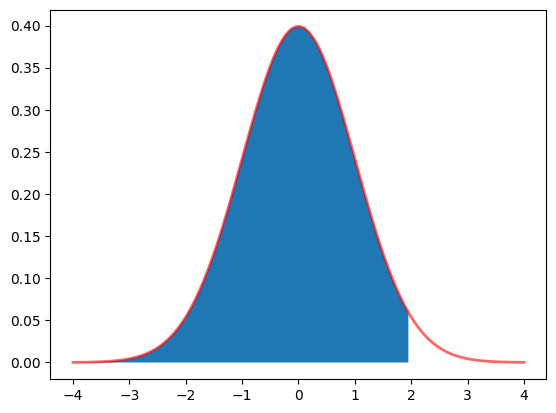

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

x = np.linspace(-4, 4, 200)
f = norm.pdf(x)
plt.plot(x, f, 'r-', lw=2, alpha=0.6, label='norm pdf')
plt.fill_between(x, f, where=(x < 1.96))

0.9750021048517795


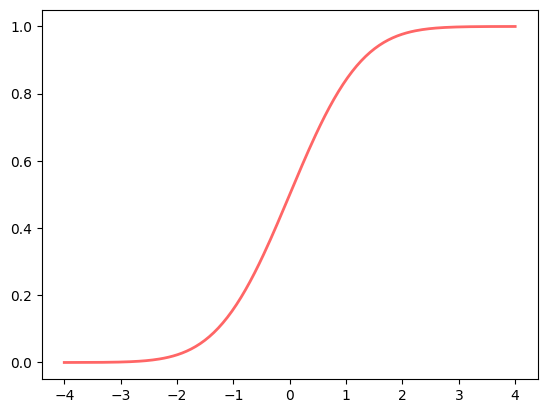

In [ ]:
f = norm.cdf(x)
plt.plot(x, f, 'r-', lw=2, alpha=0.6, label='norm pdf')
print(norm.cdf(1.96))

$$
F_{\xi}(x) = P(\xi < x)
$$

**Задание 1**. Найти 0.975 квантиль стандартного нормального распределения.

Рассмотрим стандартную нормальную случайную величину $X$. Требуется найти такое число $x_{0.975}$, что с вероятностью 0.975 случайная велчина $X$ примет значение меньшее, чем $x_{0.975}$.

Иными словами требуется решить уравнение
$$F_{\xi}(x_{0.975}) = \mathbb {P} (X\leqslant x_{0.975}) = {0.975}.$$

Найдите 0.025 квантиль стандартного нормального распределения. Сравните ее с найденной 0.975 квантилью, объясните результаты сравнения.

In [ ]:
from scipy.stats import norm

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

alpha = 0.975
print(norm.ppf(alpha)) #ppf(q, loc=0, scale=1) Percent point function (inverse of cdf — percentiles).


1.959963984540054


**Задание 2**. С надежностью P=0,95 найти доверительный интервал для оценки неизвестного математического ожидания $m$ нормально распределенной генеральной совокупности $X$, если даны генеральное среднее квадратическое отклонение $\sigma=5$, выборочная средняя $\overline{X}= 15$, а объем выборки $n=25$.

**Теоретический блок**

Пусть $X_1,\ldots, X_n$ --- случайная выборка из нормально распределенной генеральной совокупности $X  \sim \mathrm {N} (m ,\sigma^2)$, где $\sigma ^2$ --- известная дисперсия.

Определим произвольное $\gamma \in (0,1)$ и построим доверительный интервал для неизвестного среднего $m$.

Случайная величина
$$
Z=\frac {\bar {X}-m}{\sigma/\sqrt{n}}
$$
имеет стандартное нормальное распределение $\mathrm {N} (0,1).$

Пусть $z_{\frac{1+\gamma}2}$ $-$ это $\frac{1+\gamma}2$-квантиль стандартного нормального распределения, тогда в силу симметрии имеем:

$$\mathbb {P} \left(-z_{\frac{1+\gamma}2}\leq Z\leq z_{\frac{1+\gamma}2}\right)=\gamma.$$

После подстановки выражения для $Z$ получаем:

$$\mathbb {P}\left({\bar {X}}-z_{\frac{1+\gamma}2}{\frac {\sigma }{\sqrt {n}}}\leq m \leq {\bar {X}}+z_{\frac{1+\gamma}2}{\frac {\sigma }{\sqrt {n}}}\right)=\gamma.$$

In [ ]:
from scipy.stats import norm
gamma = 0.95
xBar = 15
std = 5
n = 25
quant = norm.ppf((1+gamma)/2)

low = xBar - quant * std/n**0.5
up  = xBar + quant * std/n**0.5
print('quant = ', quant)
print(low, up)

quant =  1.959963984540054
13.040036015459947 16.959963984540053


**Задание 3**.  С надежностью P=0,95 найти доверительный интервал для оценки неизвестного математического ожидания $m$ нормально распределенной генеральной совокупности $X$, если известно выборочное среднее квадратическое отклонение $S=5$, выборочная средняя $\overline{X}= 15$, а объем выборки $n=25$.

Сравните 0.95 квантиль нормального распределения и распределения Стьюдента, прокомментируйте результаты сравнения.

In [ ]:
from scipy.stats import t

gamma = 0.95
xBar = 15
S = 5
n = 25
quant = t.ppf((1 + gamma)/2, n - 1)

low = xBar - quant * S/n**0.5
up  = xBar + quant * S/n**0.5
print('quant = ', quant)
print(low, up)

quant =  2.0638985616280205
12.93610143837198 17.063898561628022
